In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fcn = 'lorenz'
L = 10
radius = 1.2
leak_rate = 0.01
n_hidden = 2**10

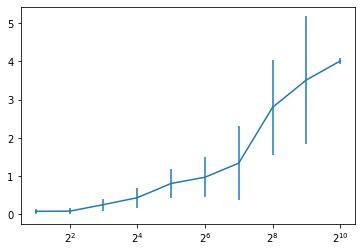

In [3]:
collect = 'size'

if fcn == 'sine':
    full_net = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_period_{L}_{collect}_last_t_predicted_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')
else:
    full_net = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_{collect}_last_t_predicted_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')

fig, ax = plt.subplots()
ax.errorbar(full_net[:,0], full_net[:,1], full_net[:,2])
ax.set_xscale('log', base=2)
plt.show()

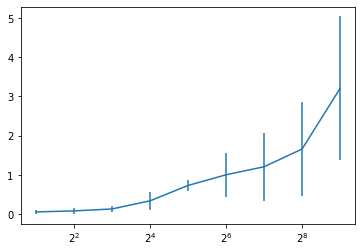

In [4]:
collect = 'random_units'

if fcn == 'sine':
    rand_units = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_period_{L}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')
else:
    rand_units = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')

fig, ax = plt.subplots()
ax.errorbar(rand_units[:,0] * n_hidden, rand_units[:,1], rand_units[:,2])
ax.set_xscale('log', base=2)
plt.show()

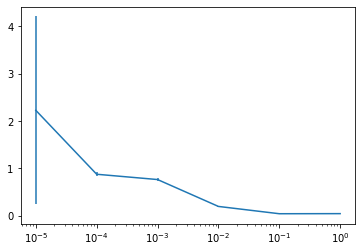

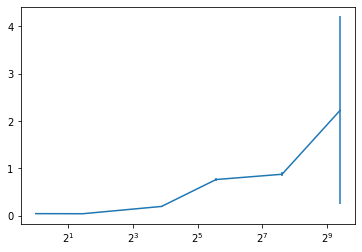

In [5]:
collect = 'lambda'

if fcn == 'sine':
    opt_sparse = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_period_{L}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')
else:
    opt_sparse = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')

fig, ax = plt.subplots()
ax.errorbar(opt_sparse[:,0], opt_sparse[:,1], opt_sparse[:,2])
ax.set_xscale('log', base=10)
plt.show()

fig, ax = plt.subplots()
ax.errorbar(opt_sparse[:,3] * n_hidden, opt_sparse[:,1], opt_sparse[:,2])
ax.set_xscale('log', base=2)
plt.show()

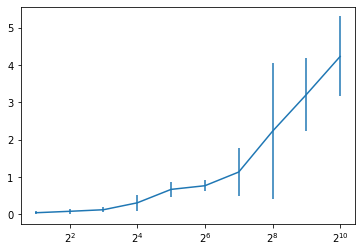

In [6]:
collect = 'average'

if fcn == 'sine':
    average = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_period_{L}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')
else:
    average = np.loadtxt(f"/cnl/data/spate/Res/{fcn}_{collect}_last_t_predicted_n_hidden_{n_hidden}_sr_{radius}_lr_{leak_rate}.csv", delimiter=',')

fig, ax = plt.subplots()
ax.errorbar(n_hidden / average[:,0], average[:,1], average[:,2])
ax.set_xscale('log', base=2)
plt.show()

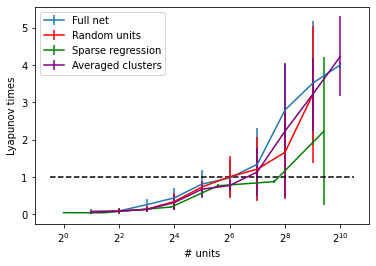

In [7]:
fig, ax = plt.subplots()
ax.errorbar(full_net[:,0], full_net[:,1], full_net[:,2], label='Full net')
ax.errorbar(rand_units[:,0] * n_hidden, rand_units[:,1], rand_units[:,2], color='red', label="Random units")
ax.errorbar(opt_sparse[:,3] * n_hidden, opt_sparse[:,1], opt_sparse[:,2], color='green', label="Sparse regression")
ax.errorbar(n_hidden / average[:,0], average[:,1], average[:,2], color='purple', label='Averaged clusters')
ax.set_xscale('log', base=2)
xmin, xmax = ax.get_xlim()
ax.hlines(1, xmin, xmax, color='k', ls='--')
ax.set_xlabel("# units")
ax.set_ylabel('Lyapunov times')
plt.legend()
plt.savefig('/home/spate/Res/figures/size_sparsity_sweep_plot_random_units_random_average_clusters.png')
plt.show()